In [1]:
import numpy as np
from numpy.random import randn
import pandas as pd

# stats
from scipy import stats

# Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

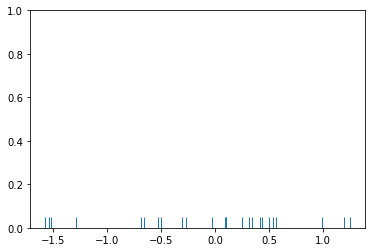

In [2]:
# starting with rug/carpet plot
dataset = randn(25)
sns.rugplot(dataset)

(0, 1)

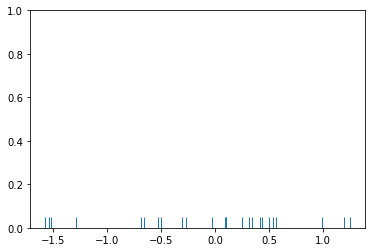

In [8]:
# control the Y-axis limits
sns.rugplot(dataset)
plt.ylim(0,1)

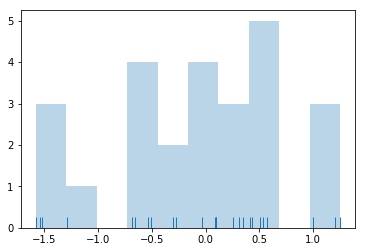

In [9]:
# lets plot a histogram on top of the rugplot
plt.hist(dataset,alpha=0.3)
sns.rugplot(dataset)

(0, 1)

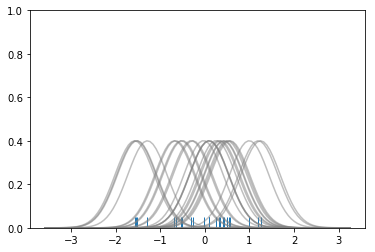

In [11]:
sns.rugplot(dataset)
x_min = dataset.min()-2
x_max = dataset.max()+2

# creates 100 equally-spaced spots
x_axis = np.linspace(x_min,x_max,100)

# create bandwidth formula
bandwidth = ((4 * dataset.std()**5) / (3 * len(dataset))) ** 0.2
kernel_list = []

for data_point in dataset:
    # create a kernel for each point and append to kernel_list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    # scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * 0.4

    plt.plot(x_axis,kernel,color='grey',alpha=0.5)
    
plt.ylim(0,1)

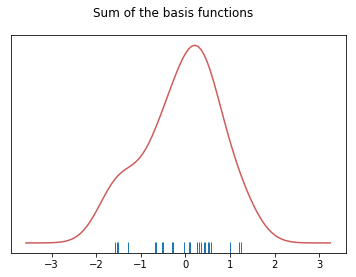

In [12]:
# now lets sum them all
sum_of_kde = np.sum(kernel_list,axis=0)
fig = plt.plot(x_axis,sum_of_kde,color='indianred')
sns.rugplot(dataset)
plt.yticks([])
plt.suptitle("Sum of the basis functions")

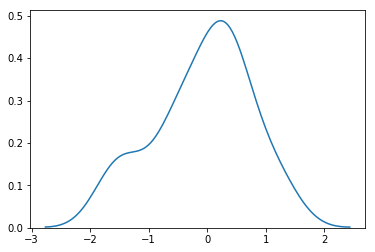

In [13]:
# now lets do that all using Seaborn, much simpler
sns.kdeplot(dataset)

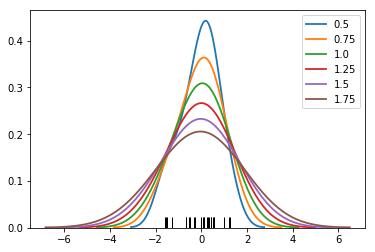

In [14]:
# diff parameters for sns rugplot

sns.rugplot(dataset, color='black')

for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset,bw=bw,lw=1.8,label=bw)

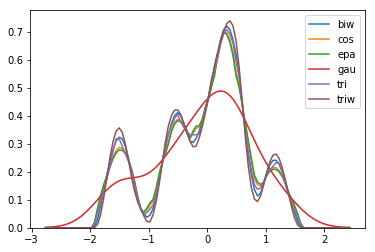

In [15]:
# lets use some different kernel options

kernel_options = ['biw','cos','epa','gau','tri','triw']
for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern)

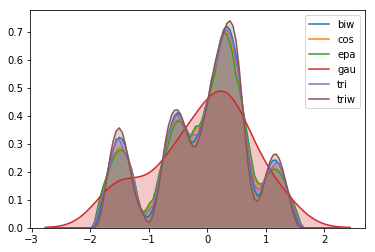

In [16]:
# lets use some shading

kernel_options = ['biw','cos','epa','gau','tri','triw']
for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern,shade=True)


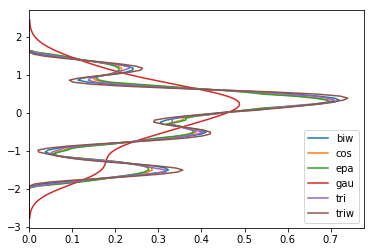

In [17]:
# let's plot on the vertical axis instead
# lets plot on the vertical axis instead

kernel_options = ['biw','cos','epa','gau','tri','triw']
for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern,vertical=True)

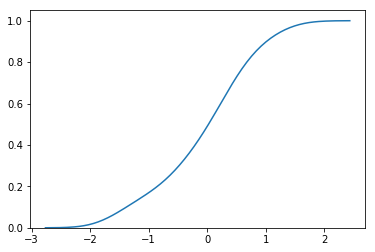

In [19]:
# lets use cumulative plotting
sns.kdeplot(dataset,cumulative=True)

/Users/dorkyegg/anaconda/lib/python3.6/site-packages/seaborn/distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


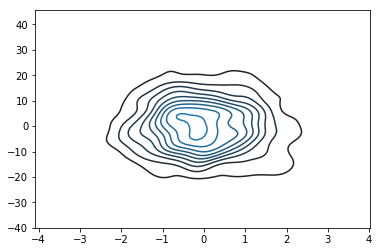

In [22]:
# lets use plots for multi-dimensional data
mean = [0,0]
cov = [[1,0],[0,100]]
# this draws random numbers from the curve structure specified
dataset2 = np.random.multivariate_normal(mean,cov,1000)

dframe = pd.DataFrame(dataset2, columns=['X','Y'])

sns.kdeplot(dframe)

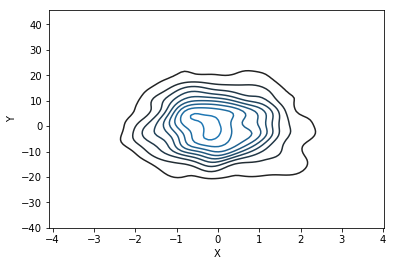

In [25]:
sns.kdeplot(dframe.X,dframe.Y)

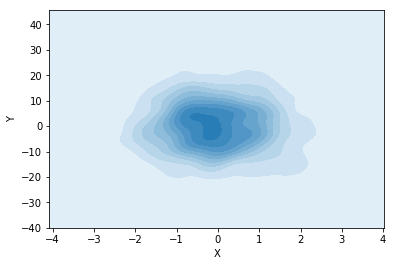

In [26]:
sns.kdeplot(dframe.X,dframe.Y,shade=True)

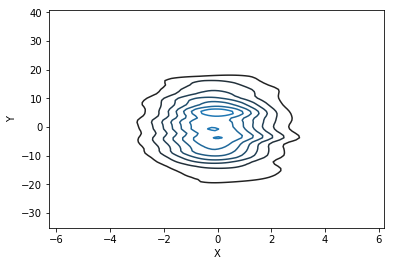

In [27]:
sns.kdeplot(dframe.X,dframe.Y,bw=1)

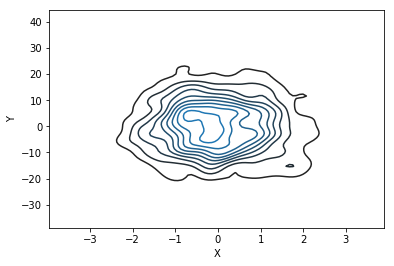

In [28]:
sns.kdeplot(dframe.X,dframe.Y,bw='silverman')

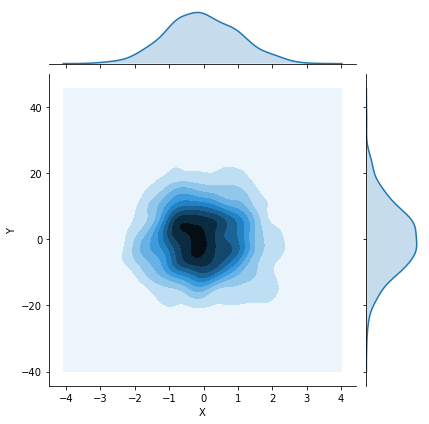

In [30]:
# createing a KDE join plot
sns.jointplot('X','Y',dframe,kind='kde')